# Лабораторная работа №2

ФИО:   
Группа: 

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

In [193]:
import matplotlib.pyplot as plt
import pandas as pd
from  scipy.stats import norm 
import numpy as np


In [194]:
data = pd.read_csv('/Users/ivan/Documents/intro_AI/labs/insurance.csv', sep=',')  # если нужно, можно поменять разделитель
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])

Переменные датасета:
Этот набор данных содержит 1338 строк застрахованных данных, где страховые сборы указаны по следующим атрибутам застрахованного лица: возраст, пол, ИМД (индекс массы тела), количество детей, курильщик и регион. Атрибуты - это смесь числовых и категориальных переменных.
В наборе данных нет отсутствующих или неопределенных значений. Поскольку целевая переменная непрерывная, задача относится к регрессии. 

In [195]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [196]:
data.shape

(1338, 7)

In [197]:
temp_data = data.copy()
Y = temp_data[["charges"]]
temp_data = temp_data.drop(columns="charges")
X = temp_data

In [198]:
Y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [199]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


## 3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы 
(обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.

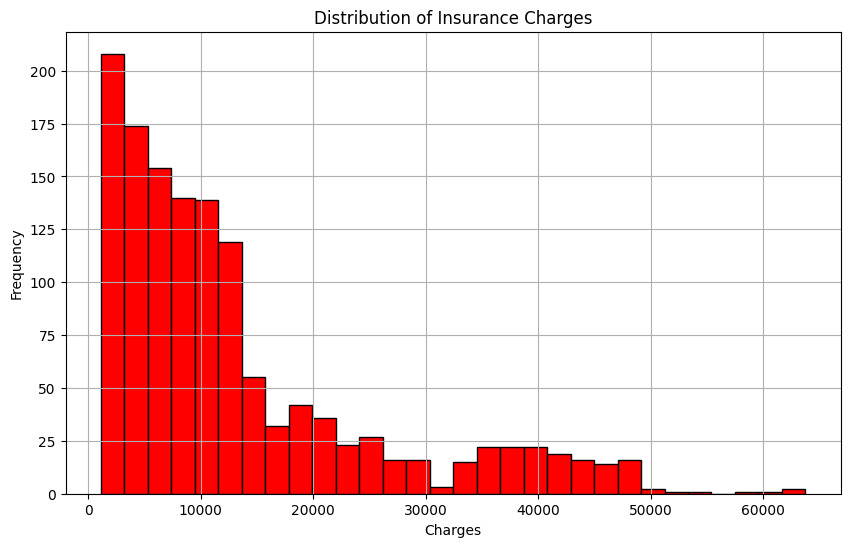

In [200]:
# гистограмма по оси x целевая переменная charhes разделенная на диапазоны, по оси y количество попаданий ее значений в диапазоны 
# (например сколько людей внесли за страховку от 9 до 10 тысяч)
plt.figure(figsize=(10, 6))
plt.hist(data['charges'], bins=30, edgecolor='black', color='red')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [201]:
unique_values_count = data['charges'].nunique()
print(f"уникальные значения: {unique_values_count}")


mean_Y = Y['charges'].mean()
median_Y = Y['charges'].median()
moda_Y = Y['charges'].mode()
print(mean_Y, median_Y, moda_Y)


уникальные значения: 1337
13270.422265141257 9382.033 0    1639.5631
Name: charges, dtype: float64


Можно сделать вывод о том, что практически все значения целевой переменной уникальные, что данные имеют правую ассиметрию и существует хвост в правую сторону, то есть у большиства людей небольшие страховые взносы. Возможен дисбаланс в данных (недостаточное кол-во людей с высокими страховыми взносами). Выборка также является неоднородной, поскольку сильно отличается от нормального распределения.

## 4. Выведите основные статистики по переменным в датасете 
(для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).

In [202]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 5. Выведите основную информацию по датасету 
(сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. 
Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 

In [204]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 7. Постройте гистограммы 5 любых признаков 
(из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.

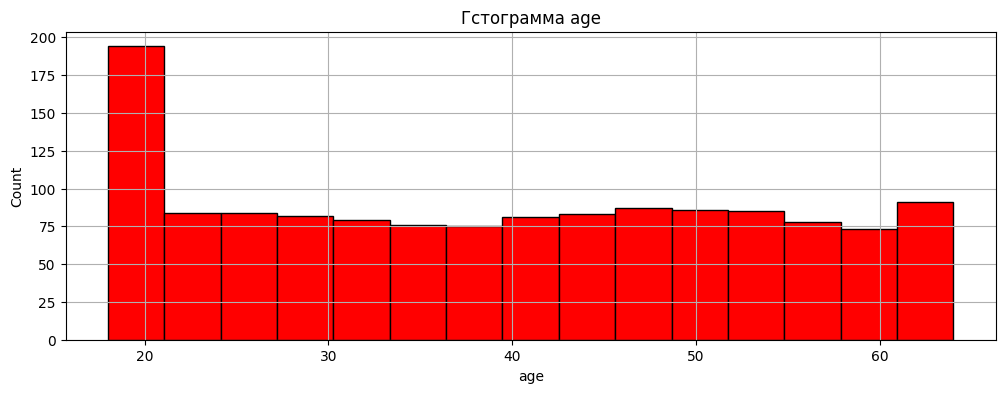

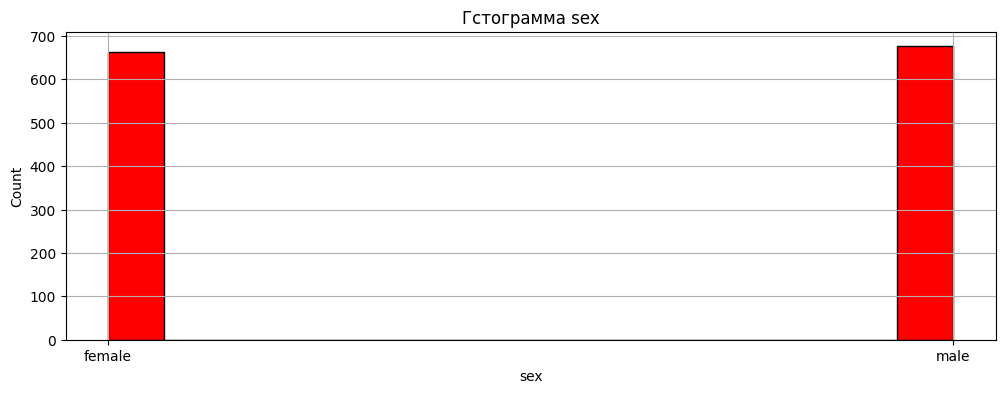

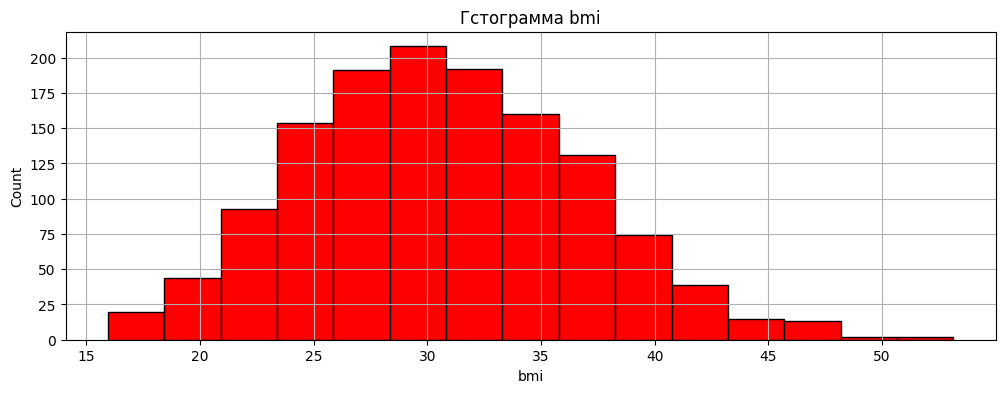

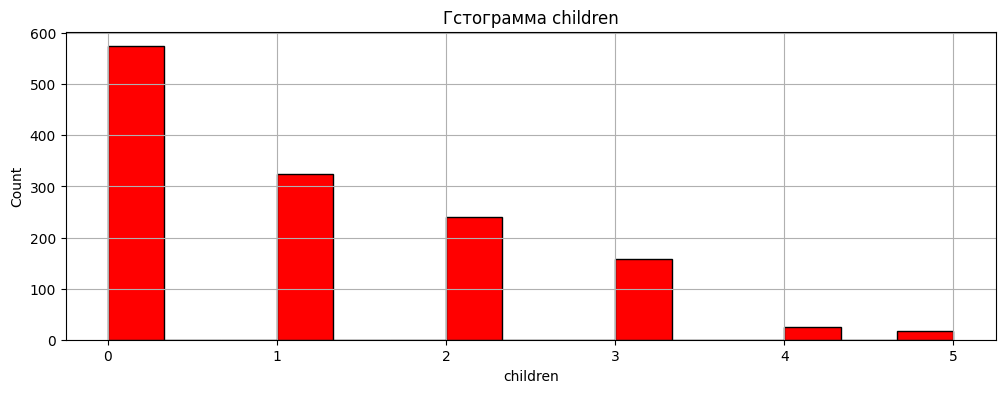

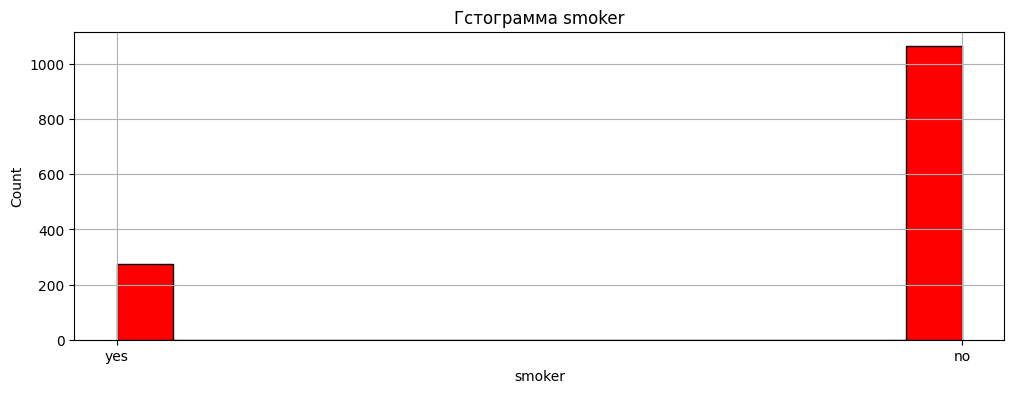

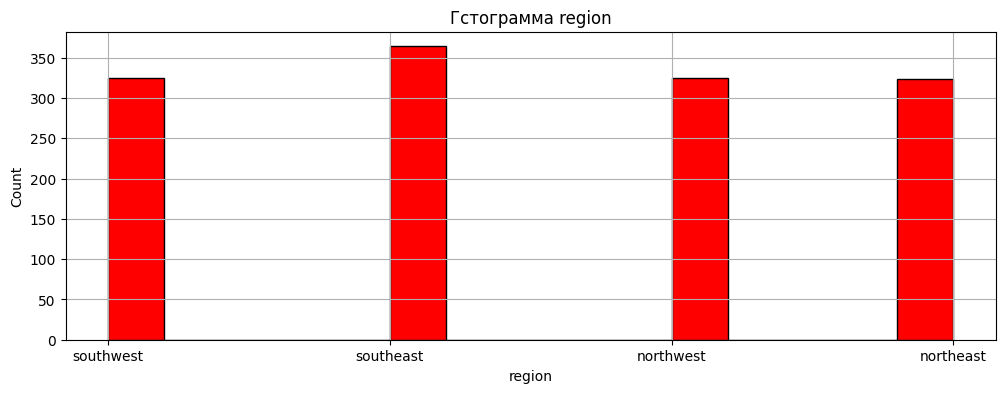

In [205]:
atributs = X.columns.to_list

for item in atributs():
    plt.figure(figsize=(12, 4))
    plt.hist(data[item], bins=15, color='red', edgecolor= 'black')

    plt.title(f'Гстограмма {item}')
    plt.xlabel(item)
    plt.ylabel('Count')

    plt.grid(True)
    plt.show()

Построив диаграммы всех 6 признаков, мы можем увидеть, что:
1) На первой гистограмме возрастов видно, что чаще всего страхуются несовершеннолетние, а остальыне возраста страхуются довольно одинаково, но в более меньшем количестве.
2) По гистограмме полов заметно, что мужской пол страхуется чуть чаще, но незначительно.
3) Гистограмма индекса массы тела говорит нам о том, что распределение людей по этому признаку можно аппроксимировать до нормального распределения, по крайней мере исходя из визуальных предположений. 
4) По дистограмме количества детей можно заметить смещение количетсва застрахованных людей влево (бездетных) и хвост вправо, снижающихся показателей, с увеличением количества детей.
5) Виден сильный перекос количества застрахованных людей без зависимости от курения.
6) По регионам количество застрахованных людей распределено +- равномерно.

## 8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной 
(если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  

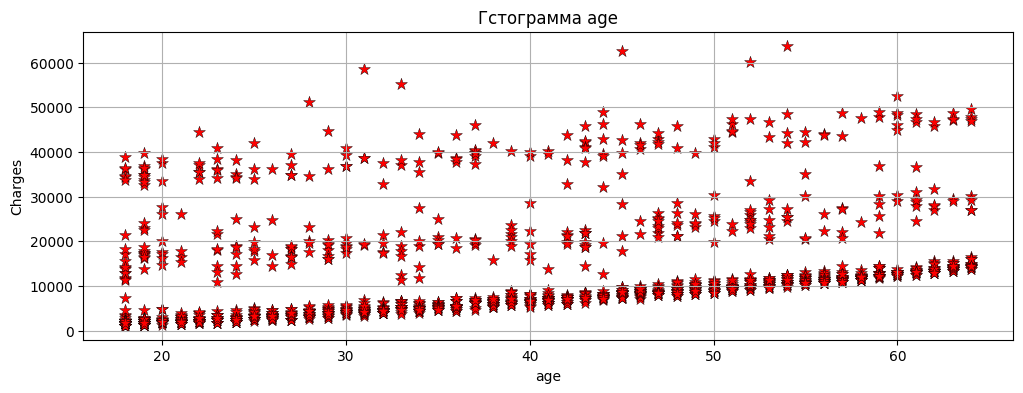

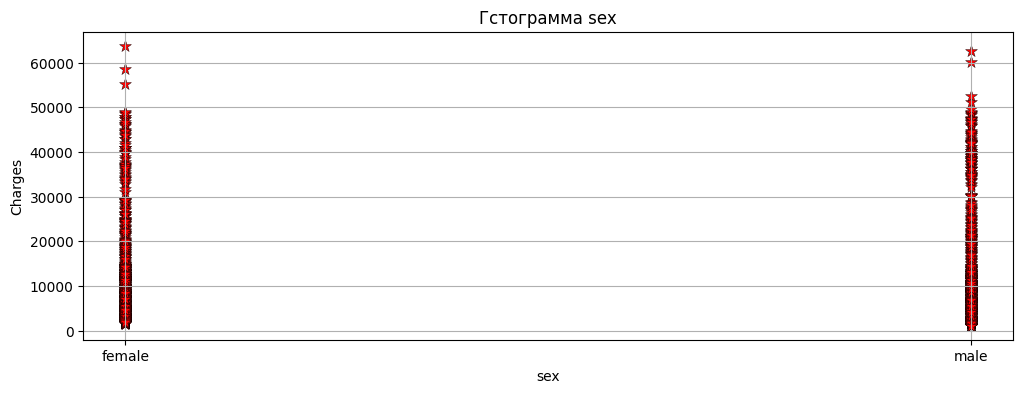

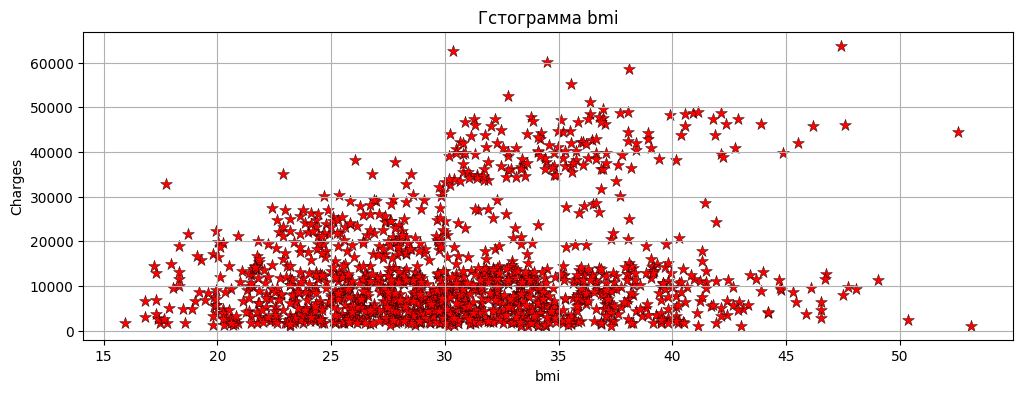

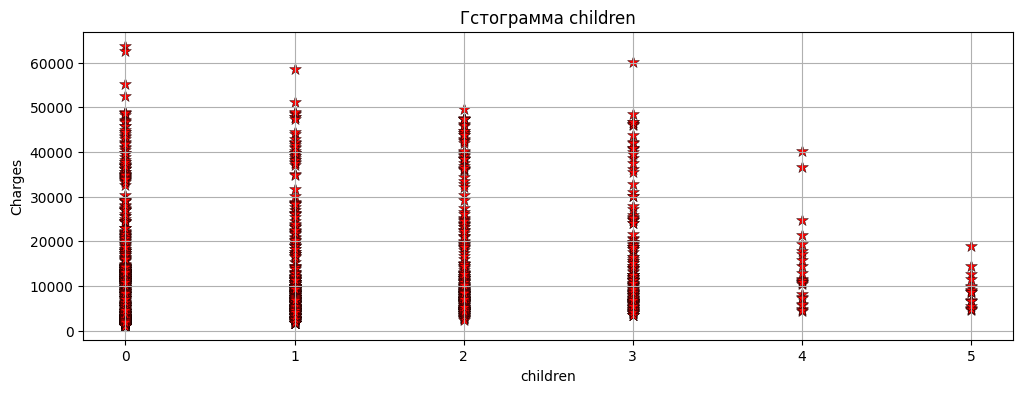

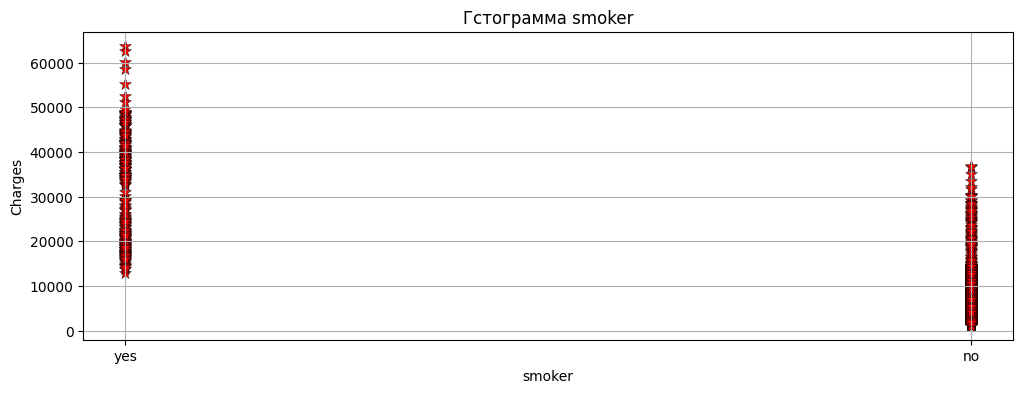

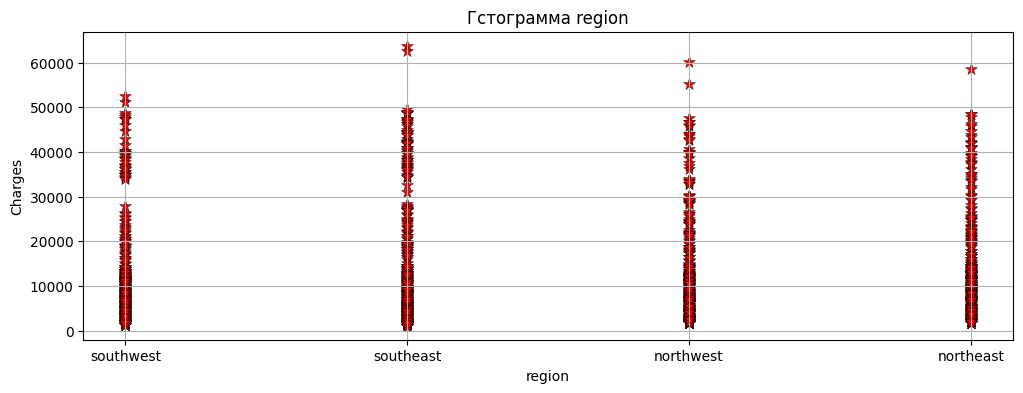

In [206]:
atributs = X.columns.to_list

for item in atributs():
    plt.figure(figsize=(12, 4))
    plt.scatter(data[item], data['charges'], s=80, linewidths=0.3, marker='*', color='red', edgecolor='black')

    plt.title(f'Гстограмма {item}')
    plt.xlabel(item)
    plt.ylabel('Charges')

    plt.grid(True)
    plt.show()

Проведя функциональный анализ зависимости стоимости страховых взносов от характеристик можно сделать выводы:
1) С увелчением возраста, увеличивается и стоимость страховки, проглядывается линейная зависимость.
2) Стоимость стаховки +- равна для обоих полов. 
3) По графику зависимости стоимости страхвоки относительно индекса массы тела можно отметить, что люди с большим ИМТ отваливают за нее большую сумму нежели люди с меньшим. После отметки ИМТ в 30 единиц, эти люди с относительным большим ИМТ деляется на две группы, одна из которых платит значительно больше, что говорит нам о том, что есть еще какие-то критерии, в следствии которогых появляется такая немалая разница в стоимость страховых услуг. 
4) В результате анализа группы лиц, имеющих детей, можно сказать, что люди с большим количестовом детей платят за страховку значительно меньше. Причем прослеживается некая линейная зависимость. Эта картина может говорить о том, что у главы многодетных семей могут иметь некие льготы (скидки).
5) Курящие люди платят значительно большие суммы за страховку в отличе от некурящих. 
6) Относительно регионов стоимость страховки распределена +- равномерно. 

### 9. Посмотрите на зависимость двух переменных одновременно от целевой переменной. 
То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

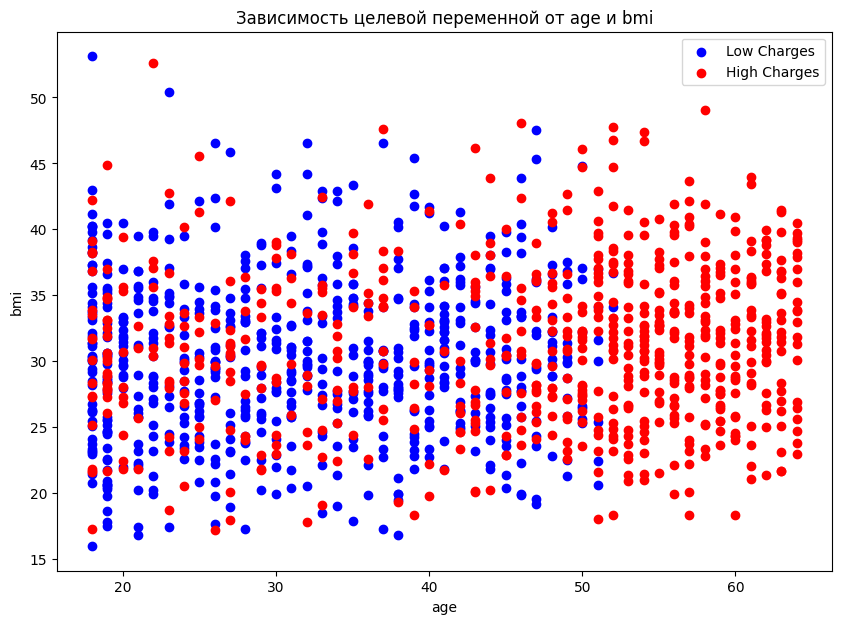

In [207]:
atribure_x, atribute_y = 'age', 'bmi'
charges_meadian = data['charges'].median()

temp_data['charges_group'] = np.where(data['charges'] <= charges_meadian, 'Low', 'High')

plt.figure(figsize=(10, 7))

low_charges = temp_data[temp_data['charges_group'] == 'Low']
high_charges = temp_data[temp_data['charges_group'] == 'High']

plt.scatter(low_charges[atribure_x], low_charges[atribute_y], color='blue', label='Low Charges')
plt.scatter(high_charges[atribure_x], high_charges[atribute_y], color='red', label='High Charges')

plt.xlabel(atribure_x)
plt.ylabel(atribute_y)
plt.title(f'Зависимость целевой переменной от {atribure_x} и {atribute_y}')

plt.legend()
plt.show()

